In [ ]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="sigmoid"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
X_train.reshape(60000, 784)

In [ ]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=10,
    batch_size=1000)

In [ ]:
model.evaluate(X_test.reshape(-1, 784), y_test)

In [ ]:
model.predict(X_test.reshape(-1, 784))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


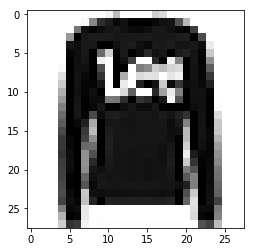

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[1])

plt.imshow(X_test[1], cmap="gray_r")
plt.show()

In [10]:
pred = model.predict(X_test.reshape(-1, 784))

In [11]:
import numpy as np

np.argmax(pred[1])

2

In [12]:
np.argmax(pred, axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
!pip install pandas_ml

In [14]:
from pandas_ml import ConfusionMatrix

ConfusionMatrix(np.argmax(y_test, axis=1), np.argmax(pred, axis=1))
#oben, was Model vorhergesagt hat, Achse nach unten, was es tatsächlich war
#

Predicted     0    1    2     3     4    5    6     7     8     9  __all__
Actual                                                                    
0           781    5   14    90     9    1   76     0    24     0     1000
1            17  914   11    45    11    0    0     0     2     0     1000
2            13    1  603    13   233    1  109     0    27     0     1000
3            61   16    7   822    52    1   35     0     6     0     1000
4             1    2  194    57   645    0   89     0    12     0     1000
5             2    0    0     4     1  648    0   162    12   171     1000
6           221    5  149    69   171    1  339     1    44     0     1000
7             0    0    0     0     0   58    0   838     1   103     1000
8             3    1   15    15     3    8   11    16   926     2     1000
9             0    0    1     2     0   21    0    36     1   939     1000
__all__    1099  944  994  1117  1125  739  659  1053  1055  1215    10000

In [15]:
np.argmax?

Signature: np.argmax(a, axis=None, out=None)
Docstring:
Returns the indices of the maximum values along an axis.

Parameters
----------
a : array_like
    Input array.
axis : int, optional
    By default, the index is into the flattened array, otherwise
    along the specified axis.
out : array, optional
    If provided, the result will be inserted into this array. It should
    be of the appropriate shape and dtype.

Returns
-------
index_array : ndarray of ints
    Array of indices into the array. It has the same shape as `a.shape`
    with the dimension along `axis` removed.

See Also
--------
ndarray.argmax, argmin
amax : The maximum value along a given axis.
unravel_index : Convert a flat index into an index tuple.

Notes
-----
In case of multiple occurrences of the maximum values, the indices
corresponding to the first occurrence are returned.

Examples
--------
>>> a = np.arange(6).reshape(2,3) + 10
>>> a
array([[10, 11, 12],
       [13, 14, 15]])
>>> np.argmax(a)
5
>>> np.argma